In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.axes import Axes
from matplotlib.colors import Colormap
from matplotlib.image import AxesImage
from matplotlib.figure import Figure
from sklearn.discriminant_analysis import unique_labels
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
def plot_confusion_matrix(
    y_true, y_pred, classes, normalize: str = None, cmap: Colormap = plt.cm.Blues
) -> Axes:
    cm: np.ndarray = confusion_matrix(
        y_true, y_pred, labels=classes, normalize=normalize
    )

    ax: Axes
    fig: Figure
    fig, ax = plt.subplots()

    im: AxesImage = ax.imshow(cm, interpolation="nearest", cmap=cmap)

    ax.figure.colorbar(im, ax=ax)

    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title="Confusion matrix",
        ylabel="True label",
        xlabel="Predicted label",
    )

    fmt: str = ".4f" if normalize else "d"
    thresh: float = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    fig.tight_layout()
    return ax

In [47]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr.shape)

(2, 3)


In [4]:
truth = [
    "Dog",
    "Not a Dog",
    "Dog",
    "Dog",
    "Dog",
    "Not a Dog",
    "Not a Dog",
    "Dog",
    "Dog",
    "Not a Dog",
]
pred = [
    "Dog",
    "Dog",
    "Dog",
    "Not a Dog",
    "Dog",
    "Not a Dog",
    "Dog",
    "Not a Dog",
    "Dog",
    "Dog",
]

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a Dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



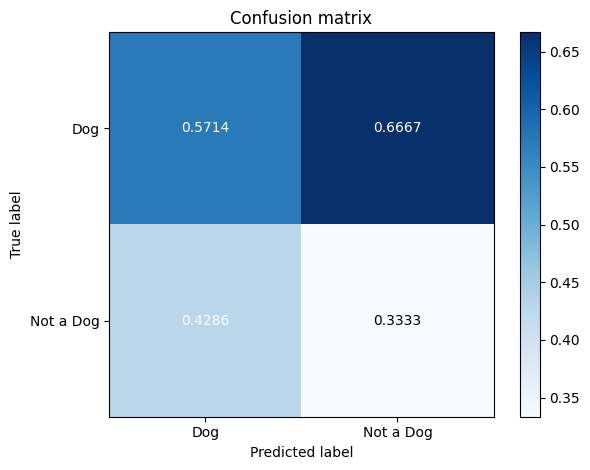

In [52]:
plot_confusion_matrix(
    truth, pred, classes=np.array(["Dog", "Not a Dog"]), normalize="pred"
)

In [62]:
print(classification_report(truth, pred, target_names=["Dog", "Not a Dog"], digits=4))

              precision    recall  f1-score   support

         Dog     0.5714    0.6667    0.6154         6
   Not a Dog     0.3333    0.2500    0.2857         4

    accuracy                         0.5000        10
   macro avg     0.4524    0.4583    0.4505        10
weighted avg     0.4762    0.5000    0.4835        10

